<a href="https://colab.research.google.com/github/challanavaneethkumar/portfolio/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries

import numpy as np #numerical computations
import pandas as pd #data manipulation
from sklearn.model_selection import train_test_split
from sklearn import tree #tree pacakge for decision tree model
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the heartattack related datset

data = '/content/drive/MyDrive/heart.csv'
df = pd.read_csv(data)
df.head()    #prints first 5 columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape  #prints the rows and columns

(303, 14)

In [ ]:
df.isna().sum()  #checking null values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes   #prints the datatypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df.info()  #data information---row,columns shape & name,null value,datatypes:how many int,str,flot etc,memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age distribuition')

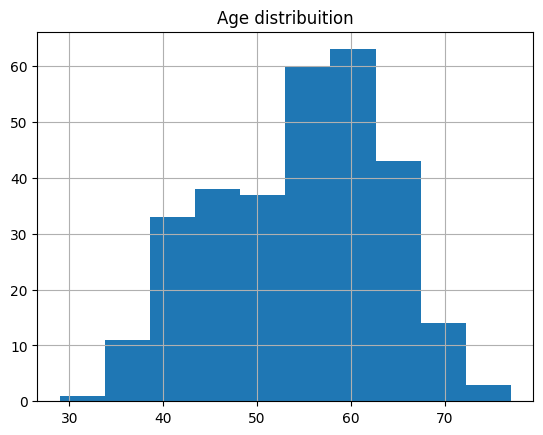

In [ ]:
#data visualization part

df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')       #matplotlib

<ipython-input-8-500dce56d0df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='female')  #visualization using  seaborn
<ipython-input-8-500dce56d0df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label='male')


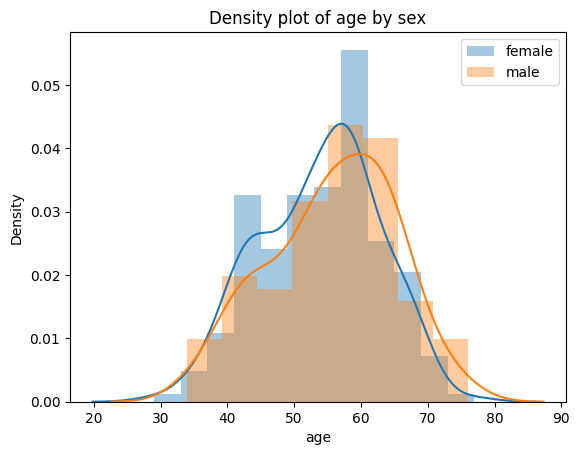

In [ ]:
sns.distplot(df[df['sex']==1]['age'],  label='female')  #visualization using  seaborn
sns.distplot(df[df['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

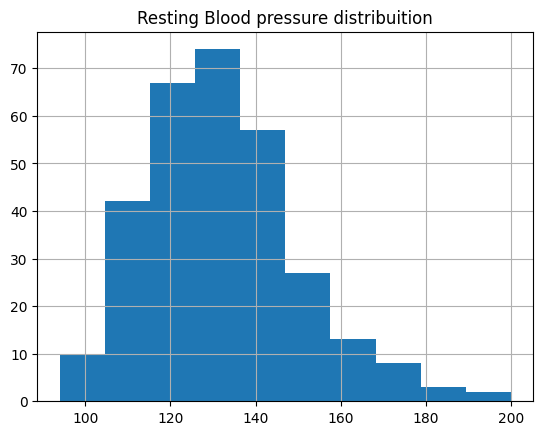

In [ ]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

<ipython-input-10-93aaadccc9da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], bins=10)


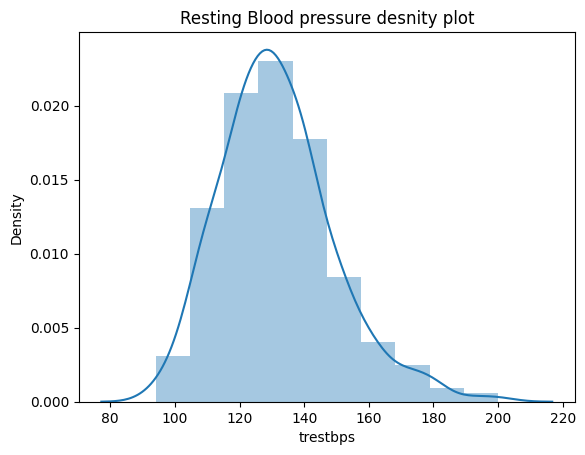

In [ ]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram(df, x='trestbps', nbins=10, title='Resting Blood Pressure Distribution')
fig.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



<Axes: xlabel='oldpeak'>

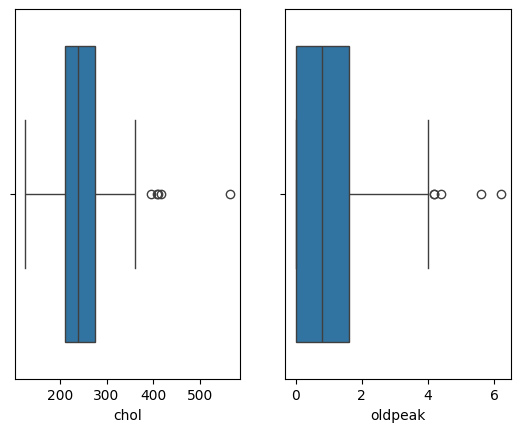

In [ ]:
#using boxplot for checking outliers
#why we used only two attributes for outliers--these two attributes are the important indicators in heart disease datasets
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, y='chol', title='Cholesterol Boxplot')

# Add a new boxplot to the subplot
fig.add_box(y=df['oldpeak'], name='Oldpeak')


fig.show()
fig.write_html('plotly_grapgh.html')  #if you want to download the report in html format

In [ ]:
!pip install autoviz #autovisualization libraries are used to quickly and easily create visualizations from datasets without extensive coding

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/heart.csv')


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
report = AV.AutoViz('/content/drive/MyDrive/heart.csv')  #AutoViz: A Python library that can automatically visualize data based on a given DataFrame


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (303, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,13,29.000000,77.000000,No issue
sex,int64,0.000000,0,0.000000,1.000000,No issue
cp,int64,0.000000,1,0.000000,3.000000,No issue
trestbps,int64,0.000000,16,94.000000,200.000000,Column has 9 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
chol,int64,0.000000,50,126.000000,564.000000,Column has 5 outliers greater than upper bound (370.38) or lower than lower bound(115.38). Cap them or remove them.
fbs,int64,0.000000,0,0.000000,1.000000,No issue
restecg,int64,0.000000,0,0.000000,2.000000,No issue
thalach,int64,0.000000,30,71.000000,202.000000,Column has 1 outliers greater than upper bound (215.12) or lower than lower bound(84.12). Cap them or remove them.
exang,int64,0.000000,0,0.000000,1.000000,No issue
oldpeak,float64,0.000000,NA,0.000000,6.200000,Column has 5 outliers greater than upper bound (4.00) or lower than lower bound(-2.40). Cap them or remove them.


All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
!pip install pycaret #PyCaret is an open-source, low-code machine learning library in Python that
#simplifies the process of training and deploying machine learning models
#it is a powerful tool for data scientists and machine learning practitioners who want to quickly explore
#and implement machine learning solutions without getting bogged down in the complexities of coding and model management.

In [ ]:
import pandas as pd
from pycaret.classification import *


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/heart.csv')  # Update the path as necessary

In [ ]:
clf = setup(data=df, target='target',  session_id=123)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models() #compares the supervised machine learning algorithms


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8201,0.9212,0.8576,0.8186,0.8303,0.6358,0.6510,0.0660
ridge,Ridge Classifier,0.8201,0.9171,0.8841,0.8069,0.8359,0.6346,0.6558,0.0980
rf,Random Forest Classifier,0.8201,0.8924,0.8583,0.8236,0.8335,0.6349,0.6474,0.4280
lda,Linear Discriminant Analysis,0.8201,0.9162,0.8841,0.8069,0.8359,0.6346,0.6558,0.0440
lr,Logistic Regression,0.8154,0.9171,0.8750,0.8061,0.8310,0.6245,0.6463,1.7670
et,Extra Trees Classifier,0.8108,0.9003,0.8508,0.8150,0.8240,0.6180,0.6342,0.1610
xgboost,Extreme Gradient Boosting,0.8017,0.8562,0.8417,0.8145,0.8171,0.5972,0.6170,0.4520
qda,Quadratic Discriminant Analysis,0.8013,0.9013,0.8152,0.8273,0.8112,0.5986,0.6111,0.0500
gbc,Gradient Boosting Classifier,0.7972,0.8810,0.8152,0.8122,0.8084,0.5900,0.5992,0.3540
lightgbm,Light Gradient Boosting Machine,0.7872,0.8706,0.8152,0.8199,0.8024,0.5683,0.5907,0.2090


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best_model)  # Prints the best model which is naive bayes


GaussianNB(priors=None, var_smoothing=1e-09)
